In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(0, 40, 1000) # start, finish, n points

In [3]:
d_r = 2.5 * t

In [4]:
d_s = 3 * (t-5)

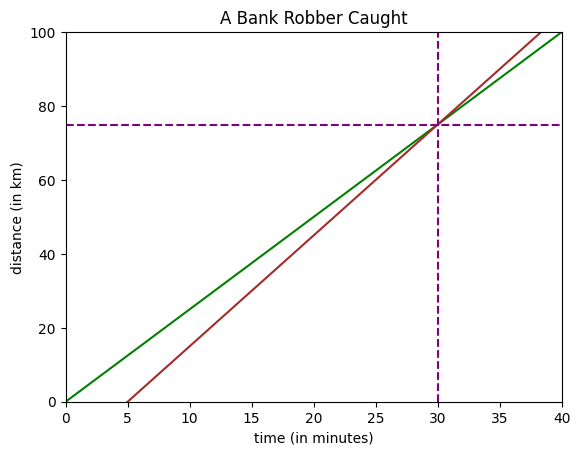

In [5]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

### Scalars (Rank 0 Tensors) in Base Python

In [6]:
x = 25
x

25

In [7]:
type(x)

int

In [8]:
y = 3

In [9]:
py_sum = x + y
py_sum

28

In [10]:
type(py_sum)

int

In [11]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [12]:
type(float_sum)

float

## Scalars in PyTorch
- PyTorch and TensorFlow are the two most popular automatic differentiation libraries (a focus of the Calculus I and Calculus II subjects in the ML Foundations series) in Python, itself the most popular programming language in ML.
- PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays.
- The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see here for example).
- Documentation on PyTorch tensors, including available data types, is here.

In [13]:
import torch

In [14]:
x_pt = torch.tensor(25) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(25)

In [15]:
x_pt.shape

torch.Size([])

### Scalars in TensorFlow (version 2.0 or later)


- tf.Variable
- tf.constant
- tf.placeholder
- tf.SparseTensor
Most widely-used is tf.Variable, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available here.

In [16]:
import tensorflow as tf

In [17]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [18]:
x_tf.shape

TensorShape([])

In [19]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [20]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [21]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [22]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

np.int16(28)

In [23]:
type(tf_sum.numpy())

numpy.int16

In [24]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

### Vectors (Rank 1 Tensors) in NumPy

In [25]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [26]:
len(x)

3

In [27]:
x.shape

(3,)

In [28]:
type(x)

numpy.ndarray

In [29]:
x[0] # zero-indexed

np.int64(25)

In [30]:
type(x[0])

numpy.int64

### Vector Transposition

In [31]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [32]:
x_t.shape

(3,)

In [33]:
# ...but it does we use nested "matrix-style" brackets:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [34]:
y.shape

(1, 3)

In [35]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [36]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [37]:
# Column vector can be transposed back to original row vector:
y_t.T

array([[25,  2,  5]])

In [38]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [39]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [40]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [41]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

## L2 Norms

In [42]:
x

array([25,  2,  5])

In [43]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [44]:
np.linalg.norm(x)

np.float64(25.573423705088842)

### L1 Norms

In [45]:
x

array([25,  2,  5])

In [46]:
np.abs(25) + np.abs(2) + np.abs(5)

np.int64(32)

### Squared L2 Norm

In [47]:
x

array([25,  2,  5])

In [48]:
(25**2 + 2**2 + 5**2)

654

In [49]:
np.dot(x, x)

np.int64(654)

### Max Norm

In [50]:
x

array([25,  2,  5])

In [51]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

np.int64(25)

### Orthogonal Vectors

In [52]:
i = np.array([1, 0])
i

array([1, 0])

In [53]:
j = np.array([0, 1])
j

array([0, 1])

In [54]:
np.dot(i, j)

np.int64(0)

### Matrices (Rank 2 Tensors) in NumPy

In [55]:
# Use array() with nested brackets:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [56]:
X.shape

(3, 2)

In [57]:
X.size

6

In [58]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [59]:
# Select middle row of matrix X:
X[1,:]

array([ 5, 26])

In [60]:
# Another slicing-by-index example:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [61]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [62]:
X_pt.shape # pythonic relative to TensorFlow

torch.Size([3, 2])

In [63]:
X_pt[1,:] # N.B.: Python is zero-indexed; written algebra is one-indexed

tensor([ 5, 26])

### Matrices in TensorFlow

In [64]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [65]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [66]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [67]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

### Higher-Rank Tensors
As an example, rank 4 tensors are common for images, where each dimension corresponds to:

- Number of images in training batch, e.g., 32
- Image height in pixels, e.g., 28 for MNIST digits
- Image width in pixels, e.g., 28
- Number of color channels, e.g., 3 for full-color images (RGB)